### Scraping and Visualizing Football Data

We're going to use a library called `squarify` to create Treemaps to visualize the goals scored per-team in the English Premier League 2020/21.

Data will be scraped from Wikipedia using `BeautifulSoup` and `requests`, from [this page](https://en.wikipedia.org/wiki/2020%E2%80%9321_Premier_League)

We will customize the look of the treemaps using Matplotlib.


In [31]:
!pip install squarify

In [32]:
import squarify
from bs4 import BeautifulSoup
import requests
import matplotlib
import matplotlib.pyplot as plt

In [33]:
BASE_URL = 'https://en.wikipedia.org/wiki/2020%E2%80%9321_Premier_League'

response = requests.get(BASE_URL)
soup = BeautifulSoup(response.content)

In [34]:
# the below is too generic - there are 12 wikitables on the page
# tables = soup.find_all('table', {'class': 'wikitable'})

# we find the element w/ ID "League_table", get its parent, 
# and find the next "table" sibling - this is the league table of data on the page
table = soup.select_one('#League_table').parent.find_next_sibling('table')

Now, let's extract each team name and each team's goals-for from the table.

In [35]:
# The index of the "Goals For" <td> (zero indexing)
GF_COL = 5

# Get all the table rows containing data (ie - not including the first row)
# The first row only contains table header information
rows = table.find_all('tr')[1:]

team_data = []

# We can now iterate over each row, and grab the team name and goals-for data.
for row in rows:
  # team name is the only <th> element under the <tr>
  team_name = row.find("th").text.strip()
  
  # goals-for col
  gf = row.find_all('td')[GF_COL].text

  # append each team's data to team_data list
  team_data.append({
      'name': team_name,
      'scored': int(gf),
  })

In [36]:
team_data

[{'name': 'Manchester City (C)', 'scored': 83},
 {'name': 'Manchester United', 'scored': 73},
 {'name': 'Liverpool', 'scored': 68},
 {'name': 'Chelsea', 'scored': 58},
 {'name': 'Leicester City', 'scored': 68},
 {'name': 'West Ham United', 'scored': 62},
 {'name': 'Tottenham Hotspur', 'scored': 68},
 {'name': 'Arsenal', 'scored': 55},
 {'name': 'Leeds United', 'scored': 62},
 {'name': 'Everton', 'scored': 47},
 {'name': 'Aston Villa', 'scored': 70},
 {'name': 'Newcastle United', 'scored': 46},
 {'name': 'Wolverhampton Wanderers', 'scored': 36},
 {'name': 'Crystal Palace', 'scored': 41},
 {'name': 'Southampton', 'scored': 47},
 {'name': 'Brighton & Hove Albion', 'scored': 40},
 {'name': 'Burnley', 'scored': 33},
 {'name': 'Fulham (R)', 'scored': 27},
 {'name': 'West Bromwich Albion (R)', 'scored': 35},
 {'name': 'Sheffield United (R)', 'scored': 20}]

Now, we'll use `squarify.plot(scored)` to calculate the treemap layout and plot it using `matplotlib`.

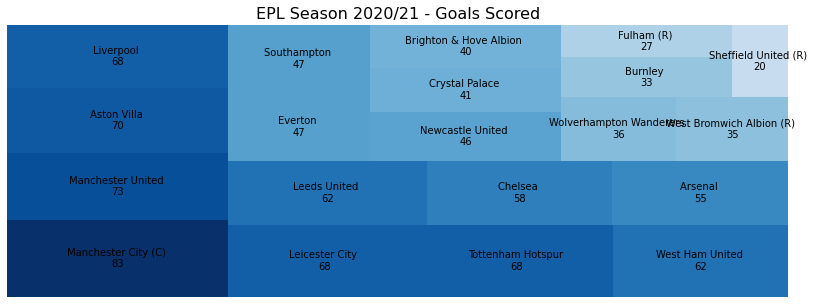

In [41]:
# sort by highest scoring team first
team_data.sort(key=lambda x: x['scored'], reverse=True)

# extract the scored and labels to be passed to squarify.plot()
scored = [d['scored'] for d in team_data]
labels = [f"{d['name']} \n{d['scored']}" for d in team_data]

# colormap normalization - "Blues" can be changed to any valid map
norm = matplotlib.colors.Normalize(vmin=0, vmax=max(scored))
colors = [matplotlib.cm.Blues(norm(value)) for value in scored]

# define the figure size, and call squarify.plot
fig, ax = plt.subplots(figsize=(14,5))
squarify.plot(sizes=scored, label=labels, color=colors, ax=ax)

plt.title("EPL Season 2020/21 - Goals Scored", fontsize=16)
plt.axis('off')
plt.show()

Let's only show labels for the N most dangerous attacking teams.

We need to sort our data first, to do this.

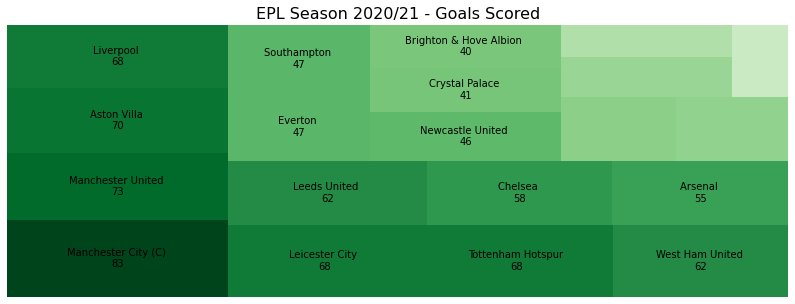

In [42]:
# let's use Greens in this one...
colors = [matplotlib.cm.Greens(norm(value)) for value in scored]

N = 15
fig, ax = plt.subplots(figsize=(14,5))
squarify.plot(sizes=scored, label=labels[:N], color=colors, ax=ax)

plt.title("EPL Season 2020/21 - Goals Scored", fontsize=16)
plt.axis('off')
plt.show()

We can use other colourmaps too, such as `viridis`.

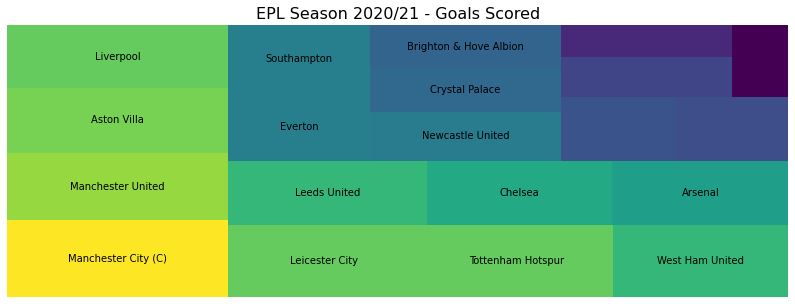

In [39]:
# let's use a viridis colourmap this time!
colors = [matplotlib.cm.viridis(norm(value)) for value in scored]

N = 15
fig, ax = plt.subplots(figsize=(14,5))
squarify.plot(sizes=scored, label=labels[:N], color=colors, ax=ax)

plt.title("EPL Season 2020/21 - Goals Scored", fontsize=16)
plt.axis('off')
plt.show()

Finally, we could represent this data with other visualizations.

A simple and effective alternative is a horizontal barplot.

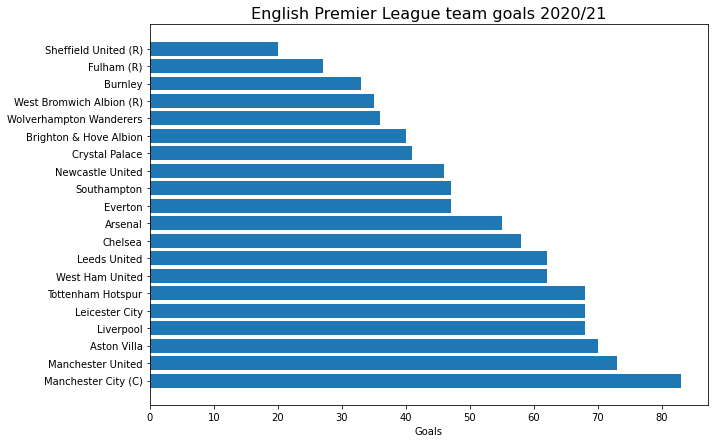

In [45]:
labels = labels = [d['name'] for d in team_data]

# define figure/axes with given figsize
fig, ax = plt.subplots(figsize=(10,7))

# define horizontal barplot
plt.barh(y=labels, width=scored) # color=colors

# set x-axis label and plot title
plt.xlabel('Goals')
plt.title("English Premier League team goals 2020/21", fontsize=16)
plt.show()